In [9]:
!pip install wbdata
import seaborn as sns  
import matplotlib.pyplot as plt
import wbdata
import pandas as pd
from datetime import datetime

In [10]:
target_countries = {
    "BRA": "Brazil", "ARG": "Argentina", "CHL": "Chile", "URY": "Uruguay",
    "ECU": "Ecuador", "COL": "Colombia", "PER": "Peru", "PRY": "Paraguay"
}
start_year, end_year = 1986, 1990


agriculture_gdp = wbdata.get_dataframe(
    {"NV.AGR.TOTL.ZS": "Agriculture_GDP"}, 
    country=list(target_countries.keys()), 
    date=(datetime(start_year, 1, 1), datetime(end_year, 12, 31))  
)


agriculture_gdp.reset_index(inplace=True)
agriculture_gdp.rename(columns={"date": "Year", "country": "Country"}, inplace=True)
agriculture_gdp["Year"] = agriculture_gdp["Year"].astype(int)


print(agriculture_gdp.head())


     Country  Year  Agriculture_GDP
0  Argentina  1990         8.123676
1  Argentina  1989         9.616065
2  Argentina  1988         8.977868
3  Argentina  1987         8.094358
4  Argentina  1986         7.800403


In [11]:
csv_file_path = "/home/jovyan/Project1/FAOSTAT_data_en_2-4-2025.csv"

try:
    df = pd.read_csv(csv_file_path, encoding="utf-8-sig")
except UnicodeDecodeError:
    df = pd.read_csv(csv_file_path, encoding="ISO-8859-1")

print(df.head())
target_countries = ["Brazil", "Argentina", "Chile", "Uruguay", "Ecuador", "Colombia", "Peru", "Paraguay"]

df_filtered = df[
    (df["Reporter Countries"].isin(target_countries)) &
    (df["Year"].between(1986, 1990)) &  
    (df["Element"].isin(["Export value", "Import value"]))  
]

df_pivot = df_filtered.pivot_table(
    index=["Reporter Countries", "Year"],
    columns="Element",
    values="Value",
    aggfunc="sum"
).reset_index()

df_pivot["Net_Export"] = df_pivot.get("Export value", 0) - df_pivot.get("Import value", 0)

df_pivot.rename(columns={"Reporter Countries": "Country"}, inplace=True)

print(df_pivot.head())  

  Domain Code                 Domain  Reporter Country Code (M49)  \
0          TM  Detailed trade matrix                           32   
1          TM  Detailed trade matrix                           32   
2          TM  Detailed trade matrix                           32   
3          TM  Detailed trade matrix                           32   
4          TM  Detailed trade matrix                           32   

  Reporter Countries  Partner Country Code (M49) Partner Countries  \
0          Argentina                          76            Brazil   
1          Argentina                          76            Brazil   
2          Argentina                          76            Brazil   
3          Argentina                          76            Brazil   
4          Argentina                          76            Brazil   

   Element Code       Element  Item Code (CPC)    Item  Year Code  Year  \
0          5922  Export value            115.0  Barley       1986  1986   
1          592

In [12]:
#The Agriculture_GDP column here represents the percentage of agricultural GDP to total GDP. 
#This data comes from the wbdata library, which looks up agricultural GDP from 1986 to 1990. 
#For example, Argentina's agricultural GDP share was 8.12 per cent in 1990 and 9.62 per cent in 1989, so it is possible to observe the yearly trend.

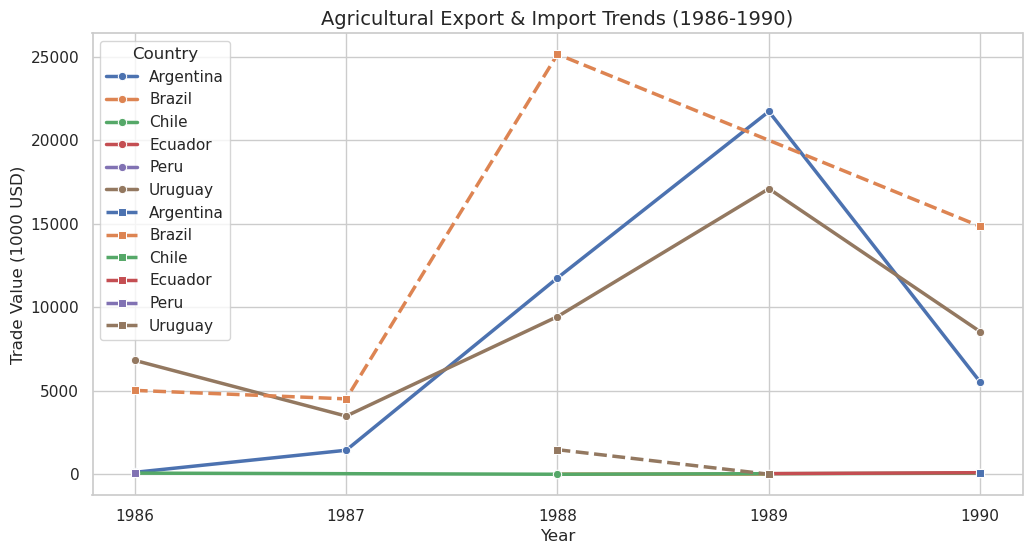

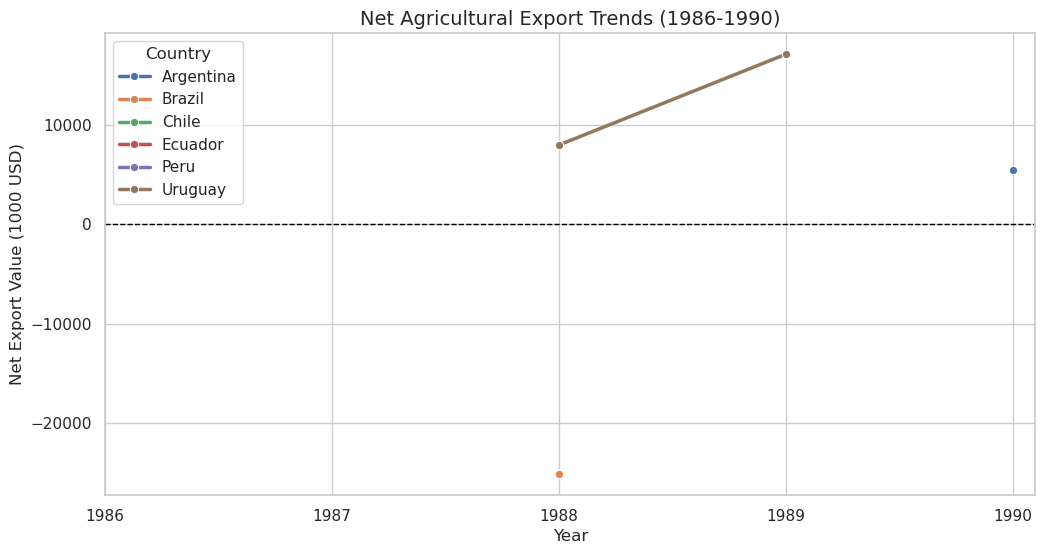

In [13]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Export value", hue="Country", data=df_pivot, marker="o", linewidth=2.5)
sns.lineplot(x="Year", y="Import value", hue="Country", data=df_pivot, marker="s", linestyle="dashed", linewidth=2.5)

plt.title("Agricultural Export & Import Trends (1986-1990)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Trade Value (1000 USD)")
plt.legend(title="Country")  
plt.xticks(df_pivot["Year"].unique())
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Net_Export", hue="Country", data=df_pivot, marker="o", linewidth=2.5)

plt.title("Net Agricultural Export Trends (1986-1990)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Net Export Value (1000 USD)")
plt.xticks(df_pivot["Year"].unique())
plt.axhline(0, color="black", linestyle="--", linewidth=1) 
plt.show()


In [14]:
#The graph shows trends in the value of exports and imports of agricultural products by country over the period 1986-1990.
#Two lines are shown:
#The blue curve represents Export value.
#The orange curve represents the Import value.
#If Export value is much higher than Import value, the country is an agricultural exporter.
#If Import value is much higher than Export value, the country is an agricultural importer.

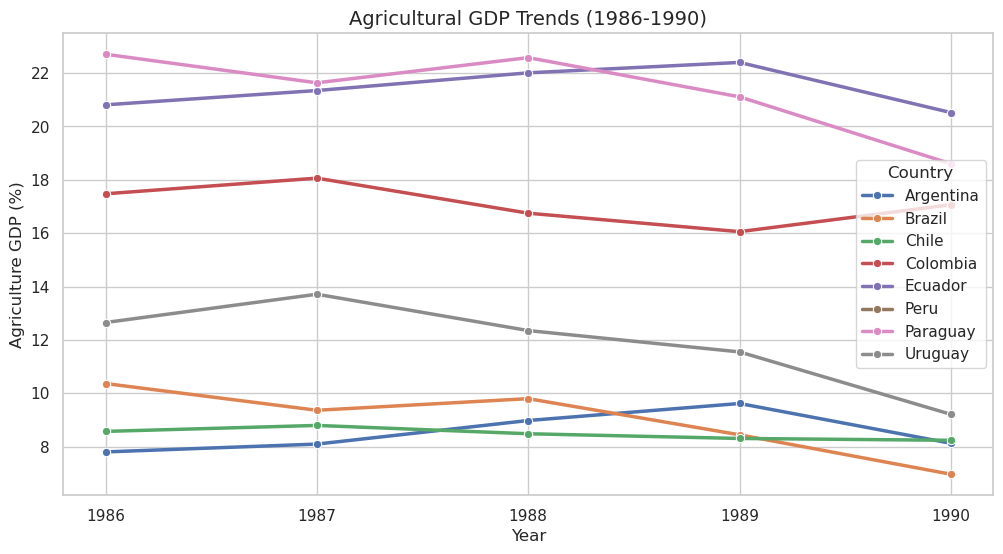

ðŸ“Š Agricultural GDP Statistics:
      Country   Mean_GDP  Std_Dev_GDP
0  Argentina   8.522474     0.752834
1     Brazil   8.985484     1.330804
2      Chile   8.477295     0.221511
3   Colombia  17.082786     0.755138
4    Ecuador  21.418313     0.789701
5   Paraguay  21.327432     1.661805
6       Peru        NaN          NaN
7    Uruguay  11.894058     1.689509
ðŸ“ˆ Agricultural GDP Growth Rate Data:
      Country  Year  Agriculture_GDP  GDP_Growth
0  Argentina  1990         8.123676         NaN
1  Argentina  1989         9.616065   18.370856
2  Argentina  1988         8.977868   -6.636778
3  Argentina  1987         8.094358   -9.840975
4  Argentina  1986         7.800403   -3.631614


/tmp/ipykernel_609/3374497401.py:31: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  agriculture_gdp["GDP_Growth"] = agriculture_gdp.groupby("Country")["Agriculture_GDP"].pct_change() * 100


In [15]:
target_countries = {
    "BRA": "Brazil", "ARG": "Argentina", "CHL": "Chile", "URY": "Uruguay",
    "ECU": "Ecuador", "COL": "Colombia", "PER": "Peru", "PRY": "Paraguay"
}
start_year, end_year = 1986, 1990

agriculture_gdp = wbdata.get_dataframe(
    {"NV.AGR.TOTL.ZS": "Agriculture_GDP"}, 
    country=list(target_countries.keys()), 
    date=(datetime(start_year, 1, 1), datetime(end_year, 12, 31))
)

agriculture_gdp.reset_index(inplace=True)
agriculture_gdp.rename(columns={"date": "Year", "country": "Country"}, inplace=True)
agriculture_gdp["Year"] = agriculture_gdp["Year"].astype(int)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Agriculture_GDP", hue="Country", data=agriculture_gdp, marker="o", linewidth=2.5)
plt.title("Agricultural GDP Trends (1986-1990)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Agriculture GDP (%)")
plt.xticks(agriculture_gdp["Year"].unique())  
plt.legend(title="Country")
plt.show()

gdp_stats = agriculture_gdp.groupby("Country")["Agriculture_GDP"].agg(["mean", "std"]).reset_index()
gdp_stats.rename(columns={"mean": "Mean_GDP", "std": "Std_Dev_GDP"}, inplace=True)
print("ðŸ“Š Agricultural GDP Statistics:\n", gdp_stats)

agriculture_gdp["GDP_Growth"] = agriculture_gdp.groupby("Country")["Agriculture_GDP"].pct_change() * 100
print("ðŸ“ˆ Agricultural GDP Growth Rate Data:\n", agriculture_gdp.head())


In [16]:
#Agricultural GDP in South America showed different trends between 1986-1990, 
#with Ecuador and Paraguay having the highest share of agricultural GDP (about 21 per cent), 
#and Argentina and Brazil fluctuating more (8-9 per cent). 
#Argentina, Uruguay and Brazil are strong agricultural exporters, 
#with Argentina showing a strong trade surplus with net exports of US$5,452,000 in 1990. 
#There may be a positive correlation between changes in agricultural GDP and export trends, 
#e.g. Argentina's 18.37 per cent growth in agricultural GDP in 1989 may be related to export growth.

# Final Project 1: Population and Agricultural Production Changes In Countries in Response to [Operation Condor]

## Team Malthus: Jocelyn  Velazquez, Reily Fairchild, Celeste Basken, and Ziheng Zhang

# Table of Contents
1. [Introduction](#Introduction)
2. [Population Function, Deliverable 1A- Population Statistics](#Population-Function)
3. [Population DataFrame Function, Deliverable 3A - Population DataFrames](#Population-Dataframe)
4. [Regular Population Pyramids, Deliverable 4B - Population Pyramids](#Regular-Population-Pyramids)
5. [Animated Population Pyramids](#[5]-Animated-Population-Pyramids)
6. [Population Maps](#Population-Maps)
7. [Agriculture Supply](#8-c-agricultural-supply)
8. [Visaulizations](#Visualizations)
9. [Conclusion](#Conclusion)


Unit Tests, Deliverable 2[A] - Unit Tests


Introduction: 

Operation Condor was a coordinated effort among South American dictatorships in the period 1960-1990, led by Chile under Augusto Pinochet, with active participation from Argentina, Bolivia, Brazil, Paraguay, and Uruguay, and later involvement by Ecuador and Peru. It aimed to suppress political dissent and eliminate opposition figures, while opening the economy to greater outside involvement from western powers like the United States. It is important to note that although there was central communication, dictatorships held power during different years in various countries, since they were not centrally installed.

While most contemporary analyses of the Condor dictatorships focus on human rights and justice, there were also economic, social, and political changes inherent in the new regimes that had significant implications for development, agriculture, and population demographics. We seek to explore this using the World Bank World Development Indicators that are publicly available at [https://databank.worldbank.org/source/world-development-indicators](https://databank.worldbank.org/source/world-development-indicators). 

## Initial Imports

In [1]:
%pip install wbdata
%pip install pandas
%pip install iso3166
%pip install cufflinks
%pip install eep153_tools
%pip install plotly

import wbdata
import pandas as pd
import math
import iso3166
import plotly.offline as py
from scipy.optimize import newton
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np
import cufflinks as cf
from matplotlib import animation as ani
cf.go_offline()

  Using cached wbdata-1.0.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached backoff-2.2.1-py3-none-any.whl.metadata (14 kB)
  Using cached dateparser-1.2.1-py3-none-any.whl.metadata (29 kB)
  Using cached shelved_cache-0.3.1-py3-none-any.whl.metadata (4.7 kB)
  Using cached tabulate-0.8.10-py3-none-any.whl.metadata (25 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzlocal-5.2-py3-none-any.whl.metadata (7.8 kB)
Using cached wbdata-1.0.0-py3-none-any.whl (18 kB)
Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
Using cached backoff-2.2.1-py3-none-any.whl (15 kB)
Using cached dateparser-1.2.1-py3-none-any.whl (295 kB)
Using cached shelved_cache-0.3.1-py3-none-any.whl (7.8 kB)
Using cached tabulate-0.8.10-py3-none-any.whl (29 kB)
Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
Using cached tzlocal-5.2-py3-none-any.whl (17 kB)
  Attempting uninstall: pytz
    Found exist

Key '-1980905078081075940' not in persistent cache.
Key '3820841584476586252' not in persistent cache.
Key '-7416541718731311269' not in persistent cache.
Key '1551603446435661305' not in persistent cache.
Key '-3207748666284889611' not in persistent cache.
Key '-8264223184218170677' not in persistent cache.
Key '2021133712851485767' not in persistent cache.
Key '-4745153669670286408' not in persistent cache.
Key '5540203227399370036' not in persistent cache.
Key '-5007456537909990096' not in persistent cache.
Key '-2480514855536696632' not in persistent cache.
Key '-8448941990073102468' not in persistent cache.
Key '-1389473691469392667' not in persistent cache.
Key '3330206562611156073' not in persistent cache.
Key '-2250594166925105051' not in persistent cache.
Key '-6485620068042675909' not in persistent cache.
Key '1177569416940250525' not in persistent cache.
Key '-580277964825326680' not in persistent cache.
Key '-6729580347150318684' not in persistent cache.
Key '61181956040422

## Population Function

### This function returns a query response to the question: 'In [year] how many [people/males/females] aged [low] to [high] were living in [the world/region/country]?'

 Please note, this function was designed to be able to answer **only** the regions of countries targeted in Operation Condor, as that is the main regional focus of this project.

In [2]:

import math
#def population(year,sex,age_low, age_high,place):
SOURCE = 40

def age_floor_lessthan_25(age_low, age_high, labels, sex):
    
    for i in np.arange(age_low, age_high+1):
            if sex == 'males':
                #labels[f'SP.POP.AG{str(i).zfill(2)}.MA.IN'] = f'SP.POP.AG{str(i).zfill(2)}.MA.IN'
                labels[f'SP.POP.AG{str(i).zfill(2)}.MA.IN'] = f'Males {str(i).zfill(2)}'
            elif sex == 'females':
                labels[f'SP.POP.AG{str(i).zfill(2)}.FE.IN'] = f'Females {str(i).zfill(2)}'
                #labels[f'SP.POP.AG{str(i).zfill(2)}.FE.IN'] = f'SP.POP.AG{str(i).zfill(2)}.FE.IN'
            else:
                #labels[f'SP.POP.AG{str(i).zfill(2)}.MA.IN'] = f'SP.POP.AG{str(i).zfill(2)}.MA.IN'
                #labels[f'SP.POP.AG{str(i).zfill(2)}.FE.IN'] = f'SP.POP.AG{str(i).zfill(2)}.FE.IN'   
                labels[f'SP.POP.AG{str(i).zfill(2)}.FE.IN'] = f'Females {str(i).zfill(2)}'
                labels[f'SP.POP.AG{str(i).zfill(2)}.MA.IN'] = f'Males {str(i).zfill(2)}'
                
def age_floor_greaterthan_25(age_low, age_high, labels, sex):
        age_floor = math.floor(age_low /5) * 5
        age_ceiling = math.ceil((age_high+1)/5)*5 
        floor_str = str(age_floor).zfill(2)
        num_ranges = (age_ceiling - age_floor) / 5
        for i in np.arange(num_ranges):
            lower_str = str(int(age_floor + 5 * i)).zfill(2)
            higher_str = str(int(age_floor + 5 * i + 4)).zfill(2)

           # lower_str = str(int(age_floor+5*i))
           # higher_str = str(int(age_floor+5*i+4))
           
             #override if age is >=80
            if lower_str >='80':
                lower_str = "80"
                higher_str = 'UP'
            if sex == 'males':
                labels[f'SP.POP.{lower_str}{higher_str}.MA'] = f'Males {lower_str}{higher_str}'
            elif sex == 'females':
                labels[f'SP.POP.{lower_str}{higher_str}.FE'] = f'Females {lower_str}{higher_str}'
            else:
                #labels[f'SP.POP.AG{str(i).zfill(2)}.FE.IN'] = f'SP.POP.AG{str(i).zfill(2)}.FE'
                labels[f'SP.POP.{lower_str}{higher_str}.FE'] = f'Females {lower_str}{higher_str}'
                labels[f'SP.POP.{lower_str}{higher_str}.MA'] = f'Males {lower_str}{higher_str}'


#correct age range, use specific age year values if do not return null:
def age_range(age_low, age_high, sex): 
    labels = {}
    
    labels_test1 = {}
    age_floor_lessthan_25(0, 24, labels_test1, 'males')
    assert 'SP.POP.AG00.MA.IN' in labels_test1 and 'SP.POP.AG24.MA.IN' in labels_test1, "Failed to retrieve data for ages < 25"

    labels_test2 = {}
    age_floor_greaterthan_25(25, 39, labels_test2, 'females')
    assert 'SP.POP.2529.FE' in labels_test2 and 'SP.POP.3539.FE' in labels_test2, "Failed to retrieve data for ages >= 25"

    #age range [0,25]
    if age_high < 25:
        age_floor_lessthan_25(age_low, age_high, labels, sex)
    #age range [25, +]
    elif age_low >= 25:
        age_floor_greaterthan_25(age_low, age_high, labels, sex)
    #age range [0, 25+]
    else:
        age_floor_lessthan_25(age_low, 24, labels, sex)
        age_floor_greaterthan_25(25, age_high, labels, sex)
        
    return labels

#correct age range, use specific age year values (0,25) do return null:
def age_range_intv(age_low, age_high, sex):
    labels = {}
    
    labels_test2 = {}
    age_floor_greaterthan_25(25, 39, labels_test2, 'females')
    assert 'SP.POP.2529.FE' in labels_test2 and 'SP.POP.3539.FE' in labels_test2, "Failed to retrieve data for ages >= 25"

     
    age_floor_greaterthan_25(age_low, age_high, labels, sex)
   
    return labels



def get_region_df(labels, age_high, sex, place, year):
    df = wbdata.get_dataframe(labels,country = place,parse_dates=True)
    df = df.reset_index()
    df2 = df[df['date'] == f'{year}-01-01']

    #if the age high is >25 and <80 and not a multiple of 5, then take a proportional fraction of the last column
    #example: 27, in range [25, 29] want (27%5 /5)
    #doesn't account for ages 81, 82, 83, etc (difficult to interpolate when so little data on older ages)
    if ((age_high>=25) & (age_high<80) & (age_high%5 != 4)):
        
        population_count = df2.iloc[0, -1]
        display(f'population count: {population_count}')
        proportion = (age_high%5+1) / 5
        df2.iloc[0, -1] = proportion*population_count
        
    return df2
#df = get_df(labels, sex, place, year)
#labels = range(22, 77, 'males')
#df = get_df(labels, 77, 'females', 'COL', 2022)
#df


def population(sex, age_low, age_high, place, year):
    # Error handling for invalid age range
    if age_low > age_high:
        raise ValueError(f"Invalid age range: ({age_low}) < ({age_high}). Please reverse the input age ranges.")

    # Validate `place` is a valid location in wbdata
    ls_countries = wbdata.get_countries()
    country_codes = [country['id'] for country in ls_countries]
    
    if place not in country_codes:
        raise ValueError(f"Invalid country code: {place}. Please enter a valid country. Call wbdata.get_countries to see the valid list of countries.")


    labels = age_range(age_low, age_high, sex)
     
    #unit test for age edge cases (if highest age lies in an interval)
    tlabels = {'SP.POP.2529.MA': 'Males 25-29'}
    df_test = get_region_df(tlabels, 27, sex, place, year)
    assert df_test.iloc[0, -1] <= df_test.iloc[0, 1], "Population proportion adjustment error!"


    df = get_region_df(labels, age_high, sex, place, year)
    
    # Check if the dataframe has any 'None' values for an age (Like 'WLD')
    if df.iloc[:, 1:].isnull().all().any():
        print('The age range (1, 25) returned null values, using interval ages ranges [0-5] instead')
        labels = age_range_intv(age_low, age_high, sex)
        df = get_region_df(labels, age_high, sex, place, year)
    
    df.drop('date', axis = 1, inplace=True)
    df['total pop in age range'] = df.sum(axis=1)
    total = df.iloc[0]['total pop in age range']
    display(f'In {year}, the number of {sex} between ages {age_low} to {age_high} living in {place} was approximately {total}')
    return df


In [3]:
#ENTER YOUR QUERIES HERE
#df_test = population('males', 0, 100, 'COL', 2000)
#assert df_test.iloc[0]['total pop in age range'] > 1e9 / 2, "Too few males in world population!"

population('males', 1, 24, 'WLD', 2000)
#df_test

'population count: 256111683.0'

The age range (1, 25) returned null values, using interval ages ranges [0-5] instead


'In 2000, the number of males between ages 1 to 24 living in WLD was approximately 1524729165.0'

Males 0004   Males 0509   Males 1014   Males 1519   Males 2024  \
23  323242397.0  319575048.0  322416810.0  295149165.0  264345745.0   

    total pop in age range  
23            1.524729e+09

## Population Dataframe
This function returns a pandas DataFrame indexed by Region or Country and Year, with columns giving counts of people in different age-sex groups. For this project, this function was designed to produce specifics for **only** regions/countries directly targeted by Operation Condor.


In [4]:
condor_countries = {'ARG': 'Argentina', 'BOL': 'Bolivia', 'BRA': 'Brazil', 'CHL': 'Chile', 'ECU': 'Ecuador', 'CLA':'Latin America and the Caribbean (IFC classification)', 'WLD' :"World"}
#labels = range(22, 77, 'females')
#df = get_df(labels, 77, 'females', 'COL', 2022)
#df


def get_region_df(age_low, age_high, sex, place, year):
    labels = range(age_low, age_high, sex)
    df = wbdata.get_dataframe(labels,country = place,parse_dates=True)
    df = df.reset_index()
    df2 = df[df['date'] == f'{year}-01-01']
    df2['date'] = year
    #if the age high is >25 and <80 and not a multiple of 5, then take a proportional fraction of the last column
    #example: 27, in range [25, 29] want (27%5 /5)
    if ((age_high>=25) & (age_high<80) & (age_high%5 != 4)):
        population_count = df2.iloc[0, -1]
        display(f'population count: {population_count}')
        proportion = (age_high%5+1) / 5
        df2.iloc[0, -1] = proportion*population_count
        
        
    return df2

get_region_df(22, 77, 'females',condor_countries, 2021)

'population count: 602985.0'

country  date  Females 22  Females 23  Females 24  Females 2529  \
2    Argentina  2021    340990.0    339364.5    341034.0     1727965.0   
66     Bolivia  2021    109809.5    108289.5    107373.5      518258.0   
130     Brazil  2021   1649095.0   1655825.0   1646923.0     8105921.0   
194      Chile  2021    140459.5    145160.0    149702.0      792156.0   
258    Ecuador  2021    155491.5    155337.5    155166.0      755239.0   
322      World  2021         NaN         NaN         NaN   290638670.0   

     Females 3034  Females 3539  Females 4044  Females 4549  Females 5054  \
2       1651617.0     1583375.0     1548702.0     1372580.0     1183031.0   
66       469786.0      400557.0      349190.0      297321.0      251647.0   
130     8299446.0     8539224.0     8027939.0     7135873.0     6449326.0   
194      795033.0      725313.0      675065.0      649398.0      629116.0   
258      701586.0      648686.0      574585.0      505627.0      442048.0   
322   296697604.0   274546997.0   246000086.0   234930861.0   223923211.0   

     Females 5559  Females 6064  Females 6569  Females 7074  Females 7579  
2       1095091.0     1017473.0      914976.0      777595.0      361791.0  
66       210244.0      169351.0      128503.0       96082.0       68510.0  
130     6076687.0     5236762.0     4186711.0     3107121.0     2055915.0  
194      586850.0      520887.0      436213.0      342926.0      236452.0  
258      377253.0      313465.0      256287.0      198079.0      137218.0  
322   202156613.0   165292891.0   144946891.0   108698089.0    71377606.0

## [4] Population Pyramids

The dictatorships of Operation Condor led to significant changes in the populations of the affected countries. This notebook first develops a population pyramid of the world in this period as an international reference, and then looks at interesting trends in population distribution and growth regionally and within selected Condor countries.

In [7]:
# Setting up 

wbdata.get_indicators(source=40)
SOURCE2=2 

# Regular Population Pyramids

In [8]:
# Tell pandas to use plotly
pd.options.plotting.backend = 'plotly'

# World Population Pyramid

# Constructing a list of all possible age categories, such as 0-4, 5-9, ... 75-79, 80PLUS.
ages = []
for a in range(0,80,5):
    ages.append(f"{a:02d}"+f"{a+4:02d}")

ages.append("80UP")
# Print the result to ensure the correct ranges are created.
print(ages)

# Unit test for 'ages'
#ages_test = population('males', 0, 100, 'COL', 2000)

ValueError: Unknown format code 'd' for object of type 'str'

# A Population Pyramid of the World

In [ ]:
py.init_notebook_mode(connected=True)

ages = []
for a in range(0,80,5):
    ages.append(f"{a:02d}"+f"{a+4:02d}")

ages.append("80UP")

layout_world1 = go.Layout(
    title="World Population Pyramid (2023)",
    title_font=dict(size=18, color='black'),
    barmode='overlay',
    width=600,
    height=600,
    paper_bgcolor='#f4f4f4',
    plot_bgcolor='#ffffff',
    font=dict(family="Arial, sans-serif", size=14, color="black"),
    xaxis=dict(
        title='Number of People',
        title_font=dict(size=16),
        tickfont=dict(size=12),
        gridcolor='lightgray'
    ),
    yaxis=dict(
        range=[0, 90],
        title='Age',
        title_font=dict(size=16),
        tickfont=dict(size=12),
        gridcolor='lightgray'
    ),
    showlegend=True
)

bins_world1 = [go.Bar(x = world.loc[str(2023),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in ages],
               orientation='h',
               name='Men',
               marker=dict(color='olive', line=dict(color='black', width=1)),
               hoverinfo='skip'
               ),

        go.Bar(x = -world.loc[str(2023),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in ages],
               orientation='h',
               name='Women',
               marker=dict(color='yellow', line=dict(color='black', width=1)),
               hoverinfo='skip',
               )
        ]

py.iplot(dict(data=bins_world1, layout=layout_world1))

# Population pyramids for target Operation Condor countries

We develop a population pyramid of all of Latin America and the Carribean for regional context. This demonstrates the general level of development in this region at the beginning of the Condor period.

In [1]:
# Regional Context
    # All of Latin America & the Caribbean (TLA)

ages = []
for a in range(0,80,5):
    ages.append(f"{a:02d}"+f"{a+4:02d}")

ages.append("80UP")

country_choice_2 = "TLA"
LA_caribbean = wbdata.get_dataframe(categories,country=country_choice_2)

# Creating a population pyramid
py.init_notebook_mode(connected=True)

layout_LA_caribbean = go.Layout(
    title="Population Pyramid of Latin America and the Caribbean (1980)",
    title_font=dict(size=18, color='black'),
    barmode='overlay',
    width=600,
    height=600,
    paper_bgcolor='#f4f4f4',
    plot_bgcolor='#ffffff',
    font=dict(family="Arial, sans-serif", size=14, color="black"),
    xaxis=dict(
        title='Number of People',
        title_font=dict(size=16),
        tickfont=dict(size=12),
        gridcolor='lightgray'
    ),
    yaxis=dict(
        range=[0, 90],
        title='Age',
        title_font=dict(size=16),
        tickfont=dict(size=12),
        gridcolor='lightgray'
    ),
    showlegend=True
)

bins_LA_caribbean = [go.Bar(x = LA_caribbean.loc[str(1980),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in ages],
               orientation='h',
               name='Men',
               marker=dict(color='olive', line=dict(color='black', width=1)),
               hoverinfo='skip'
               ),

        go.Bar(x = -LA_caribbean.loc[str(1980),:].filter(regex="Female").values,
               y = [int(s[:2])+1 for s in ages],
               orientation='h',
               name='Women',
               marker=dict(color='yellow', line=dict(color='black', width=1)),
               hoverinfo='skip',
               )
        ]

py.iplot(dict(data=bins_LA_caribbean, layout=layout_LA_caribbean))

NameError: name 'wbdata' is not defined

In [ ]:
# The population pyramids of various Operation Condor countries in 1960
    # This is before the start of Operation Condor

# Define multiple countries
country_choices = ["CHL", "BRA", "ARG", "PER"]
country_titles = ["Chile", "Brazil", "Argentina", "Peru"]

# Create a subplot layout (2 rows, 2 columns)
fig_5 = make_subplots(rows=2, cols=2, subplot_titles=country_titles)

# Loop through each country and generate its population pyramid
for i, (country, title) in enumerate(zip(country_choices, country_titles)):
    condor_countries = wbdata.get_dataframe(categories, country=country)

    # Extract male and female data
    male_data = condor_countries.loc[str(1960), :].filter(regex="Male").values
    female_data = -condor_countries.loc[str(1960), :].filter(regex="Female").values  # Negative for left alignment
    age_groups = [int(s[:2]) + 1 for s in ages]  # Convert age labels to integers

    # Determine subplot position
    row = i // 2 + 1
    col = i % 2 + 1

    # Add Male bar trace
    fig_5.add_trace(go.Bar(
        x=male_data,
        y=age_groups,
        orientation='h',
        name=f'{country} - Men',
        marker=dict(color='olive', line=dict(color='black', width=1)),
        hoverinfo='skip'
    ), row=row, col=col)

    # Add Female bar trace
    fig_5.add_trace(go.Bar(
        x=female_data,
        y=age_groups,
        orientation='h',
        name=f'{country} - Women',
        marker=dict(color='yellow', line=dict(color='black', width=1)),
        hoverinfo='skip'
    ), row=row, col=col)

 # Customize X and Y axis labels for each subplot
    fig_5.update_xaxes(title_text="Number of People", row=row, col=col)
    fig_5.update_yaxes(title_text="Age", row=row, col=col)

# Updated layout for aesthetics!
fig_5.update_layout(
    title="Population Pyramids of Selected Latin American Countries during Operation Condor (1960)",
    title_font=dict(size=18, color='black'),
    barmode='overlay',
    width=1200,  # Adjust width
    height=1000,  # Adjust height
    paper_bgcolor='#f4f4f4',
    plot_bgcolor='#ffffff',
    font=dict(family="Arial, sans-serif", size=14, color="black"),
    showlegend=True
)

# Make the final figure
fig_5.show()

In [ ]:
# The population pyramids of various Operation Condor countries after the end of the dictatorship period.
    # Note: Compare with the figure above to see the changes from 1960-1990

# Create a subplot layout (2 rows, 2 columns)
fig_4 = make_subplots(rows=2, cols=2, subplot_titles=country_titles)

# Loop through each country and generate its population pyramid
for i, (country, title) in enumerate(zip(country_choices, country_titles)):
    condor_countries = wbdata.get_dataframe(categories, country=country)

    # Extract male and female data
    male_data = condor_countries.loc[str(1990), :].filter(regex="Male").values
    female_data = -condor_countries.loc[str(1990), :].filter(regex="Female").values  # Negative for left alignment
    age_groups = [int(s[:2]) + 1 for s in ages]  # Convert age labels to integers

    # Determine subplot position
    row = i // 2 + 1
    col = i % 2 + 1

    # Add Male bar trace
    fig_4.add_trace(go.Bar(
        x=male_data,
        y=age_groups,
        orientation='h',
        name=f'{country} - Men',
        marker=dict(color='olive', line=dict(color='black', width=1)),
        hoverinfo='skip'
    ), row=row, col=col)

    # Add Female bar trace
    fig_4.add_trace(go.Bar(
        x=female_data,
        y=age_groups,
        orientation='h',
        name=f'{country} - Women',
        marker=dict(color='yellow', line=dict(color='black', width=1)),
        hoverinfo='skip'
    ), row=row, col=col)

 # Customize X and Y axis labels for each subplot
    fig_4.update_xaxes(title_text="Number of People", row=row, col=col)
    fig_4.update_yaxes(title_text="Age", row=row, col=col)

# Updated layout for aesthetics!
fig_4.update_layout(
    title="Population Pyramids of Selected Latin American Countries (1990)",
    title_font=dict(size=18, color='black'),
    barmode='overlay',
    width=1200,  # Adjust width
    height=1000,  # Adjust height
    paper_bgcolor='#f4f4f4',
    plot_bgcolor='#ffffff',
    font=dict(family="Arial, sans-serif", size=14, color="black"),
    showlegend=True
)

# Make the final figure
fig_4.show()

Taken together, these population pyramids reveal the change in population demography related to economic development during the Condor period (1960-1990). 

As demonstrated, many countries subjected to Operation Condor still had wide-based population pyramids in 1960. This indicates a low development, including a high population growth rate, shorter life-spans, and a high total fertility rate. By 1990, many of these pyramids have grown wider in the middle, indicating a country's move from low-income to middle-income status. For example, compare Chile (1960) to Chile (1990) to see the growth of the middle-aged cohort.

While it was achieved through deplorable means, the short-term growth focus of Operation Condor meant target countries prioritized rapid development at all expense and fundamentally altered population growth dynamics. In the following animated section, we look at how these changes can be viewed over time, and with global context.

## [5] Animated Population Pyramids

In [ ]:
# Animated Population Pyramid of the World

# Define available years
years = [1970, 1980, 1990, 2000, 2010, 2020]
ages = [f"{i}-{i+4}" for i in range(0, 85, 5)] + ["85+"]  # Includes 85+ group

# Function to create bar traces for a given year
def get_traces(year):
    male_values = world.loc[str(year)].filter(regex="Male").values
    female_values = world.loc[str(year)].filter(regex="Female").values

    return [
        go.Bar(
            x=male_values,
            y=[int(s.split('-')[0]) + 1 if '-' in s else int(s[:-1]) for s in ages],
            orientation='h',
            name='Men',
            marker=dict(color='olive', line=dict(color='black', width=1)),
            hoverinfo='skip'
        ),
        go.Bar(
            x=-female_values,  # Keep negative values for left alignment
            y=[int(s.split('-')[0]) + 1 if '-' in s else int(s[:-1]) for s in ages],
            orientation='h',
            name='Women',
            marker=dict(color='yellow', line=dict(color='black', width=1)),
            hoverinfo='skip'
        )
    ]

# Ensure index is properly formatted for lookup
max_population = max(world.loc[world.index.astype(str).isin(map(str, years))].filter(regex="Male|Female").max().values)

# Create figure with initial data (1970)
fig2 = go.Figure(data=get_traces(1970), frames=[
    go.Frame(data=get_traces(year), name=str(year)) for year in years
])

# Update layout with proper axis alignment
fig2.update_layout(
    title="Animated World Population Pyramid (1970-2020)",
    width=700, height=600, paper_bgcolor='#f4f4f4', plot_bgcolor='#ffffff',
    font=dict(family="Arial, sans-serif", size=14, color="black"),
    xaxis=dict(title="Population", gridcolor='lightgray', range=[-max_population, max_population]),
    yaxis=dict(title="Age Group", gridcolor='lightgray'),
    barmode='overlay',
    showlegend=True,
    updatemenus=[{
        "buttons": [
            {"args": [None, {"frame": {"duration": 1000, "redraw": True}, "fromcurrent": True}],
             "label": "Play", "method": "animate"},
            {"args": [[None], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate"}],
             "label": "Pause", "method": "animate"}
        ],
        "type": "buttons", "x": 0.1, "y": 0
    }],
    sliders=[{
        "steps": [{"args": [[str(year)], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate"}],
                   "label": str(year), "method": "animate"} for year in years],
        "currentvalue": {"prefix": "Year: ", "font": {"size": 16}}
    }]
)

fig2.show()

## Population Maps

In [ ]:
!pip install geopandas contextily matplotlib pandas
!pip install --upgrade contextily xyzservices

import matplotlib.pyplot as plt
import contextily as ctx  
import geopandas as gpd
file_path = "south-america_652.geojson"
southamerica= gpd.read_file(file_path)
southamerica


In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
southamerica.plot(ax=ax, edgecolor="black", color="pink")

plt.title("South America Map")
plt.show()

In [ ]:
southamerica.head()

In [ ]:
selected_countries = ["Brazil", "Chile", "Argentina", "Uruguay", "Ecuador", "Colombia", "Peru", "Paraguay"]
filtered_df = southamerica[southamerica["name"].isin(selected_countries)]
print(southamerica.columns)


In [ ]:
population_data = {
    "Country": ["Brazil", "Chile", "Argentina", "Uruguay", "Ecuador", "Colombia", "Peru", "Paraguay"],
    "Population": [213000000, 19000000, 45000000, 3500000, 17800000, 50800000, 33000000, 7100000]
}
population_df = pd.DataFrame(population_data)

In [ ]:
merged_df = filtered_df.merge(population_df, left_on="name", right_on="Country")

In [ ]:
import contextily as ctx
print(ctx.providers.keys())

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
merged_df.plot(column="Population", cmap="OrRd", linewidth=0.8, edgecolor="black", legend=True, ax=ax)
ax.set_title("Population Distribution in South America", fontsize=15)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=10)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()





In [ ]:
argentina = southamerica[southamerica['name'] == 'Argentina']
argentina.plot()

## 8. [C] Agricultural Supply

Thomas Malthus claimed that basic population modeling presents a scary vision of human growth. He argued that human population growth is exponential, while the productivity of agricultural production grows linearly. Therefore, he posited that humans would suffer or turn to other mechanisms of population regulation.

This hypothesis is interesting in the context of Operation Condor. Condor occured in low- and middle-income countries, which often started the 1960s with low agricultural productivity and high population growth rates. The capitalist dictatorships developed through Operation Condor viewed economic development and capitalist free enterprise as essential components of their development strategy. They employed mass terror as a tool of despotic control. In smaller countries or those with more extreme violence, the scale of these atrocities affected the overall population size, as Malthus predicted that warfare might.

Perhaps unsurprisingly, the Malthusian theory did not play out in Condor countries. The dictatorships, with US and western support, imported new agricultural technologies and limited regulations, enabling increased agricultural productivity. Population growth slowed as the economy developed. Even after the end of the dictatorships, the development and international technologies imported during this period led to near-linear population growth, as seen below.

In [ ]:
# Set pandas plotting options to plotly.
pd.options.plotting.backend = 'plotly'
SOURCE2=2 

In [ ]:
# Define the Operation Condor countries of interest: Chile, Brazil, Argentina, Peru, Colombia, Ecuador, Paraguay, and Uruguay.
#condor_countries = ['CHL', 'BRA', 'ARG', 'PER', 'COL', 'ECU', 'PRY', 'URY']

# Without Brazil (it can be nice to look at it this way since Brazil is so much larger that it changes axis scaling significantly).
condor_countries = ['CHL', 'ARG', 'PER', 'COL', 'ECU', 'PRY', 'URY']

# Pull out population as a variable of interest
pop_var = {"SP.POP.TOTL":"Population"}

# Create figure
pop_data = wbdata.get_dataframe(pop_var, country=condor_countries, parse_dates=True).squeeze().unstack('country')

fig_pop_data = pop_data.plot(title="Population Growth in Operation Condor Countries (1960-2023)",
                    labels={"index": "Year", "value": "Total Population", "variable": "Country"},
                    template="plotly_white",
                    line_shape="spline")

fig_pop_data.update_layout(xaxis_title="Year", yaxis_title="Total Population", legend_title="Country", width=900, height=500)
fig_pop_data.show()

Population growth in Operation Condor countries during the dictatorship period (roughly 1960-1990) and for 30 years afterwards did not appear to follow the Malthusian theory: growth appears roughly linear, instead of exponential, as expected by his hypothesis. While the population is growing in nearly every country, it is not in a linear manner.

In [ ]:
# Changes in agricultural food supply
# Note that this code uses the Condor countries as defined above.

# Pull out food production as a variable of interest
food_var = {"AG.PRD.FOOD.XD":"Food_Production"}

# Create figure
food_data = wbdata.get_dataframe(food_var, country=condor_countries, parse_dates=True).squeeze().unstack('country')

fig_food_data = food_data.plot(title="Food Production in Operation Condor Countries (1960-2023)",
                    labels={"index": "Year", "value": "Total Population", "variable": "Country"},
                    template="plotly_white",
                    line_shape="spline")

fig_food_data.update_layout(xaxis_title="Year", yaxis_title="Food Production relative to 2014-2016 Period", legend_title="Country", width=900, height=500)
fig_food_data.show()

In [ ]:
# Note that this code uses the Condor countries as defined above.

# Pull out crop production as a variable of interest
crop_var = {"AG.PRD.CROP.XD":"Crop_Production"}

# Create figure
crop_data = wbdata.get_dataframe(crop_var, country=condor_countries, parse_dates=True).squeeze().unstack('country')

fig_crop_data = crop_data.plot(title="Crop Production in Operation Condor Countries (1960-2023)",
                    labels={"index": "Year", "value": "Total Population", "variable": "Country"},
                    template="plotly_white",
                    line_shape="spline")

fig_crop_data.update_layout(xaxis_title="Year", yaxis_title="Crop Production relative to 2014-2016 Period", legend_title="Country", width=900, height=500)
fig_crop_data.show()

As can be seen in the figures above, crop and food production grew during the Operation Condor period and for 30 years after. This growth varies by country, but it does appear to be growing more than linearly. 

## Conclusions

Our project sought to understand the implications of Operation Condor on a variety of indicators not typically associated with this political era. We demonstrated through population pyramids